# Predicting car prices using a clustering prediction method: K-nearest neighbors

In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

### Adding column names to the data

In [438]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [439]:
cars.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


### Replacing missing values with numpy.nan

In [440]:
cars = cars.replace('?', np.nan)
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now that I have replaced all "?" values with numpy NaN values, I will check if any columns that contain NaN values now need to be converted from object to numeric types.

In [441]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [442]:
cols2 = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

cars[cols2] = cars[cols2].apply(pd.to_numeric)


In [443]:
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Verifying the appropriate changes in data types, I have confirmed that my previously object-type columns are now converted to an integer or float type.

# Handling Missing Data

In [444]:
print(cars['normalized-losses'].isna().sum())
print(cars['normalized-losses'].mean())

41
122.0


In [445]:
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

The 'normalized-losses' column has 41 missing values, roughly one-quarter of the data. I, however, do not want to delete this column entirely and thereby lose a potentially important attribute. I will instead insert the mean of this column into the missing values.

In [446]:
cars['normalized-losses'] = cars['normalized-losses'].fillna(122.0)
print(cars['normalized-losses'].value_counts())

122.0    45
161.0    11
91.0      8
150.0     7
104.0     6
134.0     6
128.0     6
94.0      5
74.0      5
85.0      5
103.0     5
168.0     5
95.0      5
65.0      5
102.0     5
148.0     4
106.0     4
93.0      4
118.0     4
115.0     3
154.0     3
125.0     3
137.0     3
101.0     3
83.0      3
194.0     2
110.0     2
145.0     2
119.0     2
197.0     2
108.0     2
188.0     2
129.0     2
81.0      2
164.0     2
192.0     2
158.0     2
153.0     2
87.0      2
89.0      2
113.0     2
121.0     1
98.0      1
186.0     1
78.0      1
107.0     1
77.0      1
90.0      1
256.0     1
231.0     1
142.0     1
Name: normalized-losses, dtype: int64


Next I will delete the four rows of missing data in the price column. Price is the variable that I want to predict, so if this data is missing, then that row is of no use to me.

In [447]:
cars = cars.dropna(subset=['price'])
cars.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-rate     0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [448]:
missing_cols = ['bore', 'stroke', 'horsepower', 'peak-rpm']

In [449]:
cars[missing_cols].isna().sum()

bore          4
stroke        4
horsepower    2
peak-rpm      2
dtype: int64

The rest of my numeric columns only have from two to four missing values in total. I will also replace these missing values with the mean of their repective columns.

In [450]:
cars[missing_cols].mean()

bore             3.330711
stroke           3.256904
horsepower     103.396985
peak-rpm      5117.587940
dtype: float64

In [451]:
cars[missing_cols] = cars[missing_cols].fillna(cars[missing_cols].mean())

In [452]:
cars[missing_cols].isna().sum()

bore          0
stroke        0
horsepower    0
peak-rpm      0
dtype: int64

In [453]:
cars.select_dtypes([int, float]).isna().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

I now have no more missing numeric values in my dataset. It is now cleaned and ready for the first step toward prediction: normalizing values so each attribute is valued upon the same scale.

## Normalzing Numeric Columns

By converting each feature to it's standard deviation from it's respective mean, I will be weighting all of my features the same. 

In [454]:
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [455]:
numerics = cars.select_dtypes(['int64', 'float64']).columns
normalized_cars = (cars[numerics] - cars[numerics].mean()) / cars[numerics].std()
normalized_cars['price'] = cars['price']
normalized_cars.head(10)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.720753,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,1.720753,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,0.126876,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0
3,0.923814,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.430252,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,13950.0
4,0.923814,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,0.219617,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,17450.0
5,0.923814,0.000000,0.165335,0.251498,0.195551,-0.272351,-0.094079,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,15250.0
6,0.126876,1.125132,1.154395,1.501278,2.622423,0.789818,0.557385,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,17710.0
7,0.126876,0.000000,1.154395,1.501278,2.622423,0.789818,0.770029,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,18920.0
8,0.126876,1.125132,1.154395,1.501278,2.622423,0.871523,1.025201,0.099271,-0.748720,0.452769,-0.465492,0.979591,0.799836,-1.273365,-1.568060,23875.0
10,0.923814,2.187756,0.396116,0.210921,-0.518235,0.217881,-0.310589,-0.454322,0.631507,-1.445680,-0.340647,-0.064150,1.427302,-0.339254,-0.247473,16430.0


This new dataset above is now ready for analysis. I have selected the features (columns) that I want to use to begin building my prediction model. By normalizing the values, each feature is weighted the same, all along the same scale of dist

## K-nearest neighbor model

Now I will define a function to split my data for training and testing, instantiate a KNeighborsRegressor class, fit the model, make predictions, and then calculate and return the RMSE value.

In [456]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, dataframe):
    np.random.seed(1)
    shuffled_index = np.random.permutation(dataframe.index)
    rand_df = dataframe.reindex(shuffled_index)
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_col]],train_df[target_col])
    predictions = knn.predict(test_df[[train_col]])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [457]:
rmses = {}

for col in normalized_cars.columns:
    rmse = knn_train_test(col, 'price', normalized_cars)
    rmses[col] = rmse
    
rmses

{'bore': 6793.0574839170895,
 'city-mpg': 4754.637378183515,
 'compression-rate': 6606.571345933599,
 'curb-weight': 4453.680702653493,
 'engine-size': 3297.6997444813674,
 'height': 8132.467731772246,
 'highway-mpg': 4625.047587445843,
 'horsepower': 4047.376554982472,
 'length': 5429.644739577333,
 'normalized-losses': 7337.2848203845515,
 'peak-rpm': 7643.0703228739185,
 'price': 1427.0212970303621,
 'stroke': 8006.096427246941,
 'symboling': 7979.434919842381,
 'wheel-base': 5461.490335934409,
 'width': 4772.510209128695}

The rmse values above tell me how well each attribute can predict prices using only one feature and the default parameters of the k-nearest neighbors algorithm. I will now modify the parameters by selecting more 'neighbors', in hopes of improving rmse scores.

In [458]:
def knn_train_test(train_col, target_col, dataframe, k):
    np.random.seed(1)
    shuffled_index = np.random.permutation(dataframe.index)
    rand_df = dataframe.reindex(shuffled_index)
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[train_col]],train_df[target_col])
    predictions = knn.predict(test_df[[train_col]])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

knn_train_test('engine-size', 'price', normalized_cars, 3)

2946.7417879781224

Next I will create a visualization that plots multiple k values for every column.

In [459]:
k_values = [1, 3, 5, 7, 9]

rmses_engine = []

for k in k_values:
    rmse = knn_train_test('engine-size', 'price', normalized_cars, k)
    rmses_engine.append(rmse)
    
print(rmses_engine)
print(k_values)

[3227.659787364569, 2946.7417879781224, 3297.6997444813674, 3563.43509928404, 3831.764970642862]
[1, 3, 5, 7, 9]


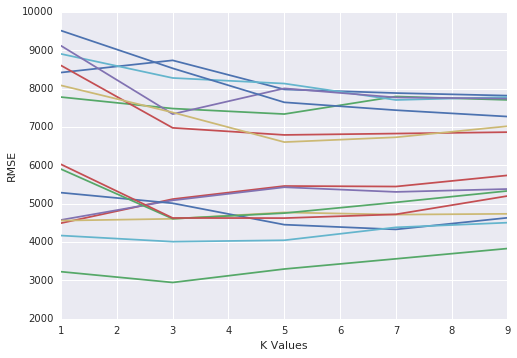

In [460]:
cars_no_price = normalized_cars.columns.drop('price')

for col in cars_no_price:
    k_values = [1, 3, 5, 7, 9]
    rmses_col = []
    for k in k_values:
        rmse = knn_train_test(col, 'price', normalized_cars, k)
        rmses_col.append(rmse)
    plt.plot(k_values, rmses_col)
    plt.xlabel('K Values')
    plt.ylabel('RMSE')

This line plot represents each column's respective rmse score at each associated k-value. I have two main takeaways from this. One is that there are two main clusters of rmse scores, about half of the features - near the top of the chart - have rmse scores much higher than the group below. Secondly, looking at k-values among the more accurate group of features, the optimal k-value appears to be '3'.

Next I will modify my function to accept multiple columns and the default k parameter.

In [461]:
def knn_train_test(train_cols, target_col, dataframe):
    np.random.seed(1)
    shuffled_index = np.random.permutation(dataframe.index)
    rand_df = dataframe.reindex(shuffled_index)
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_cols],train_df[target_col])
    predictions = knn.predict(test_df[train_cols])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [462]:
# model with two best features

two_best = ['engine-size', 'horsepower']
knn_train_test(two_best, 'price', normalized_cars)

2938.1306900277887

In [463]:
three_best = ['engine-size', 'horsepower', 'curb-weight']
knn_train_test(three_best, 'price', normalized_cars)

3381.822928364506

In [464]:
four_best = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg']
knn_train_test(four_best, 'price', normalized_cars)

3310.1513473220853

In [465]:
five_best = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'city-mpg']
knn_train_test(five_best, 'price', normalized_cars)

3328.7098403417676

In [466]:
six_best = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'city-mpg', 'width']
knn_train_test(six_best, 'price', normalized_cars)

3415.73077323836

My lowest rmse value is still using the two best features, engine-size and horsepower

Now I will take my top three models and train hyperparameter values for k from 1 to 25. This will tell me the optimal k value and optimal features to use for the best model.

In [467]:
def knn_train_test(train_cols, target_col, dataframe, k):
    np.random.seed(1)
    shuffled_index = np.random.permutation(dataframe.index)
    rand_df = dataframe.reindex(shuffled_index)
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_df[train_cols],train_df[target_col])
    predictions = knn.predict(test_df[train_cols])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [468]:
best_rmses = {}

for k in range(1,25):
    rmse = knn_train_test(two_best, 'price', normalized_cars, k)
    best_rmses[k] = rmse
    
best_rmses # k=2 is the winner

{1: 2824.8287076781794,
 2: 2615.442453055988,
 3: 2676.6521480521455,
 4: 2831.7841198370656,
 5: 2938.1306900277887,
 6: 3128.516968715745,
 7: 3204.0554389097565,
 8: 3459.8826047221833,
 9: 3715.847780310613,
 10: 3980.307424292901,
 11: 4151.348212046468,
 12: 4231.233582321214,
 13: 4321.751665703992,
 14: 4366.489859575597,
 15: 4487.120412964203,
 16: 4591.609216968047,
 17: 4683.284404125849,
 18: 4739.084337496269,
 19: 4784.099214347852,
 20: 4777.706746763483,
 21: 4816.3918959481325,
 22: 4806.480777296786,
 23: 4832.819314595003,
 24: 4883.724636768665}

In [469]:
third_best_rmses = {}

for k in range(1,25):
    rmse = knn_train_test(four_best, 'price', normalized_cars, k)
    third_best_rmses[k] = rmse
    
third_best_rmses # k=2 is the winner once again

{1: 2931.3359286735927,
 2: 2449.204419725712,
 3: 2737.2963773851316,
 4: 3023.615860404084,
 5: 3310.1513473220853,
 6: 3680.5749361799553,
 7: 3822.66524123877,
 8: 3941.803936227475,
 9: 4128.550042537242,
 10: 4186.681207350303,
 11: 4189.97072330332,
 12: 4245.571814422869,
 13: 4229.300079763142,
 14: 4309.176332083907,
 15: 4344.966176465758,
 16: 4454.519002021644,
 17: 4474.875684150935,
 18: 4525.314891455131,
 19: 4615.0673237723295,
 20: 4623.937643790557,
 21: 4644.897615402241,
 22: 4676.60559700624,
 23: 4714.098628773666,
 24: 4758.477959676704}

In [470]:
fourth_best_rmses = {}

for k in range(1,25):
    rmse = knn_train_test(five_best, 'price', normalized_cars, k)
    fourth_best_rmses[k] = rmse
    
fourth_best_rmses # k=2 neighbors once again

{1: 2774.775739756385,
 2: 2446.949933130534,
 3: 2772.0330302887987,
 4: 2975.9942356453007,
 5: 3328.7098403417676,
 6: 3663.5210274382,
 7: 3788.9407640070294,
 8: 3937.7188597237373,
 9: 4083.983149614679,
 10: 4089.9547732617693,
 11: 4174.925561598668,
 12: 4289.381759938663,
 13: 4290.858469652085,
 14: 4318.2307105677955,
 15: 4396.053400106698,
 16: 4472.405158680058,
 17: 4542.835775286443,
 18: 4569.576890062431,
 19: 4636.1915150757795,
 20: 4631.580771186524,
 21: 4651.794736718062,
 22: 4676.867285518568,
 23: 4722.037386159513,
 24: 4761.310117814777}

In [471]:
fifth_best_rmses = {}

for k in range(1,25):
    rmse = knn_train_test(six_best, 'price', normalized_cars, k)
    fifth_best_rmses[k] = rmse
    
fifth_best_rmses

{1: 2502.607863571894,
 2: 2878.0108530540724,
 3: 2937.264340007604,
 4: 3129.2705640444465,
 5: 3415.73077323836,
 6: 3552.8563109766555,
 7: 3590.084644897216,
 8: 3773.305097389114,
 9: 3858.2963252174727,
 10: 4004.9831592580504,
 11: 4135.685274123869,
 12: 4266.744996734831,
 13: 4336.338851856008,
 14: 4345.19040153955,
 15: 4362.9253940565395,
 16: 4368.676312215845,
 17: 4405.460969539992,
 18: 4433.306430919558,
 19: 4469.773972493991,
 20: 4504.4946933783,
 21: 4591.673119606178,
 22: 4685.06345069375,
 23: 4752.875684818337,
 24: 4801.876263340083}

The model's accuracy decreased significantly with the top six features. My optimal parameters are the top 5 features and a k value of 2. This resuled in an RMSE score of 2446. This means my model is able to predict prices in the test data by an average of $2446 deviation from the mean.

For the finishing touch, I will plot a line chart showing the actual price column in comparison to my predictions.

In [472]:
def knn_train_test(train_cols, target_col, dataframe, k):
    np.random.seed(1)
    shuffled_index = np.random.permutation(dataframe.index)
    rand_df = dataframe.reindex(shuffled_index)
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_df[train_cols],train_df[target_col])
    predictions = knn.predict(test_df[train_cols])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    plt.scatter(test_df[target_col], predictions)
    plt.xlabel('Actual Price ($)')
    plt.ylabel('Predicted Price ($)')
    plt.xlim(0, 50000)
    plt.ylim(0, 50000)
    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

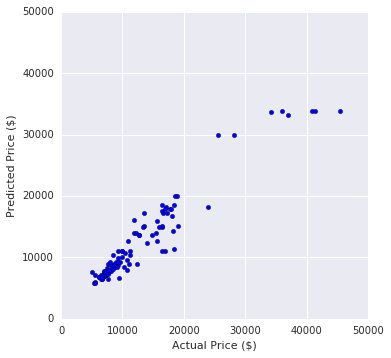

In [473]:
knn_train_test(fourth_best, 'price', normalized_cars, 2)

From the chart, we can see that predictions and actual price have a linear relationship, following a general 45 degree upward trend, albiet with a few outliers as well. Particularly below 20,000 dollars, the model fits quite well. For the most expensive cars, above 30,000 dollars, my model stalls. It does not seem able to predict the price very well for a car above roughly 30,000 dollars. If I wanted to try predicting prices for a car above 30,000 dollars, I would either rework my model or better yet, make a new one for expensive cars.